In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
from tqdm import tqdm
import cv2

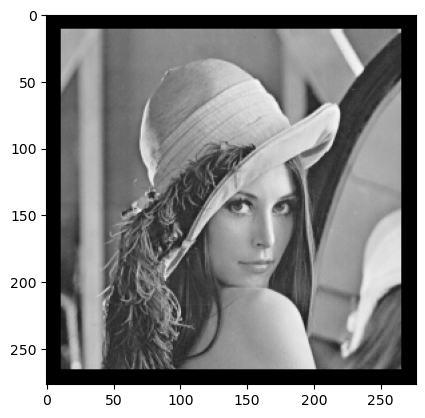

In [2]:
img = cv2.imread("lena.png",0)
plt.imshow(img,cmap="gray");

In [3]:
img.dtype

dtype('uint8')

In [4]:
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d

In [5]:
def Gaussian_Blurring(given_img,sigma):
    m,n=int(np.ceil(6*sigma+1)),int(np.ceil(6*sigma+1))
    tr,tc=given_img.shape[0],given_img.shape[1]
    Final_img = np.zeros([tr+m-1,tc+n-1])
    s = 0
    if(m!=1):
        for r in range(m):
            for c in range(n):
                s = s+(1/(2*np.pi*sigma**2))*np.exp(-((r-m//2)**2+(c-n//2)**2)/(2*sigma**2))
    print(s)
    for row in tqdm(range(tr)):
        for col in range(tc):
            if(m!=1):
                for r in range(m):
                    for c in range(n):
                        Final_img[row+m//2+r-m//2][col+n//2+c-n//2] = Final_img[row+m//2+r-m//2][col+n//2+c-n//2]+int(given_img[row][col]*(1/(2*np.pi*sigma**2*s))*np.exp(-((r-m//2)**2+(c-n//2)**2)/(2*sigma**2)))
            else:
                Final_img[row][col] = Final_img[row][col]+given_img[row][col]
    if (m//2>=1):
        return Final_img[m//2:-(m//2)+1,m//2:-(m//2)+1]
    else:
        return Final_img

In [6]:
def add_gaussian_noise(img, sigma):
    gauss = np.random.normal(0, sigma, np.shape(img))
    noisy_img = img + gauss
    noisy_img[noisy_img < 0] = 0
    noisy_img[noisy_img > 255] = 255
    return noisy_img

In [7]:
def wiener_filter(img, kernel, K):
    kernel /= np.sum(kernel)
    dummy = np.copy(img)
    dummy = fft2(dummy)
    kernel = fft2(kernel, s = img.shape)
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    dummy = dummy * kernel
    dummy = np.abs(ifft2(dummy))
    return dummy

In [8]:
def Gaussian_Kernal(sigma):
    m,n=int(np.ceil(6*sigma+1)),int(np.ceil(6*sigma+1))
    Kernal = np.zeros([m,n])
    s = 0
    if(m!=1):
        for r in range(m):
            for c in range(n):
                Kernal[r][c] = (1/(2*np.pi*sigma**2))*np.exp(-((r-m//2)**2+(c-n//2)**2)/(2*sigma**2))
                s = s+(1/(2*np.pi*sigma**2))*np.exp(-((r-m//2)**2+(c-n//2)**2)/(2*sigma**2))
    return Kernal/s

# σn = 1, σb = 1.5

In [9]:
blurred_img = Gaussian_Blurring(img,sigma=1.5)

noisy_img = add_gaussian_noise(blurred_img, sigma = 1)

kernel = Gaussian_Kernal(sigma=1.5)


0.9975676473775693


100%|██████████| 277/277 [00:29<00:00,  9.54it/s]


In [10]:
K_val = np.arange(0.01,2.001,0.001)
min_rms = 10**10
k_min = 0
for k in K_val:
    filtered_img = wiener_filter(noisy_img, kernel, K =k )
    rms_error = np.mean((img-filtered_img)**2)
    if(rms_error<min_rms):
        k_min = k
print("Optimal k = {}".format(k_min))

Optimal k = 1.9999999999999982


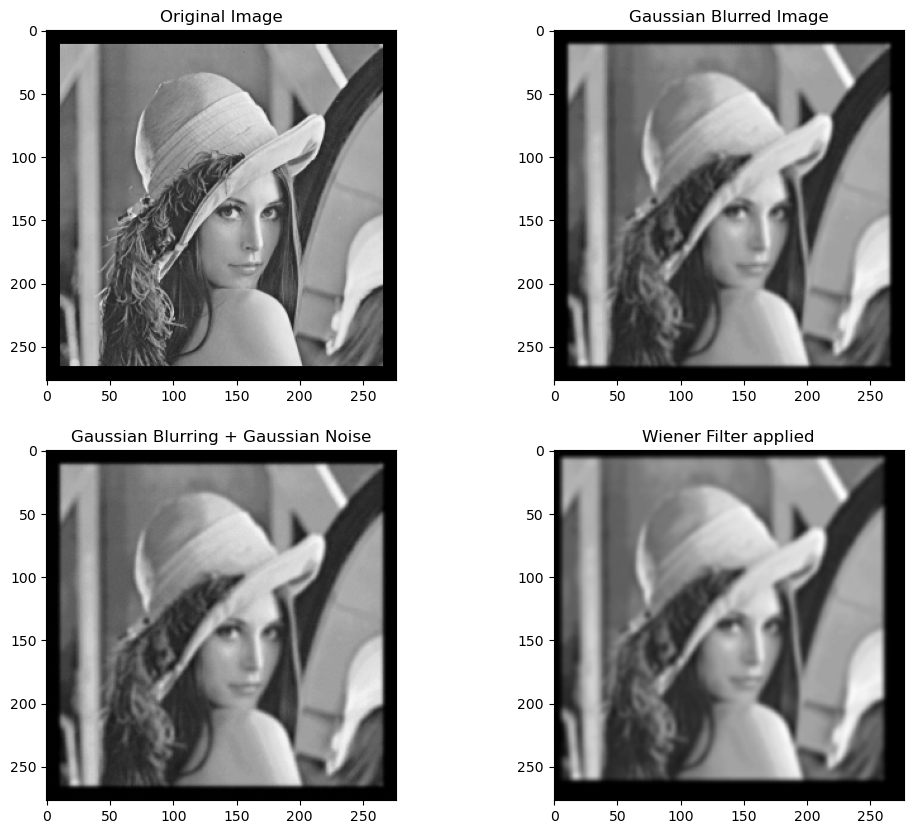

In [11]:
filtered_img = wiener_filter(noisy_img, kernel, K =k_min )

display = [img, blurred_img, noisy_img, filtered_img]
label = ['Original Image', 'Gaussian Blurred Image', 'Gaussian Blurring + Gaussian Noise', 'Wiener Filter applied']

fig = plt.figure(figsize=(12, 10))

for i in range(len(display)):
    fig.add_subplot(2, 2, i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])

plt.show()

# σn = 5, σb = 1.5

In [12]:
blurred_img = Gaussian_Blurring(img,sigma=1.5)

noisy_img = add_gaussian_noise(blurred_img, sigma = 5)

kernel = Gaussian_Kernal(sigma=1.5)

K_val = np.arange(0.01,2.001,0.001)
min_rms = 10**10
k_min = 0
for k in K_val:
    filtered_img = wiener_filter(noisy_img, kernel, K =k )
    rms_error = np.mean((img-filtered_img)**2)
    if(rms_error<min_rms):
        k_min = k
print("Optimal k = {}".format(k_min))

0.9975676473775693


100%|██████████| 277/277 [00:27<00:00, 10.10it/s]


Optimal k = 1.9999999999999982


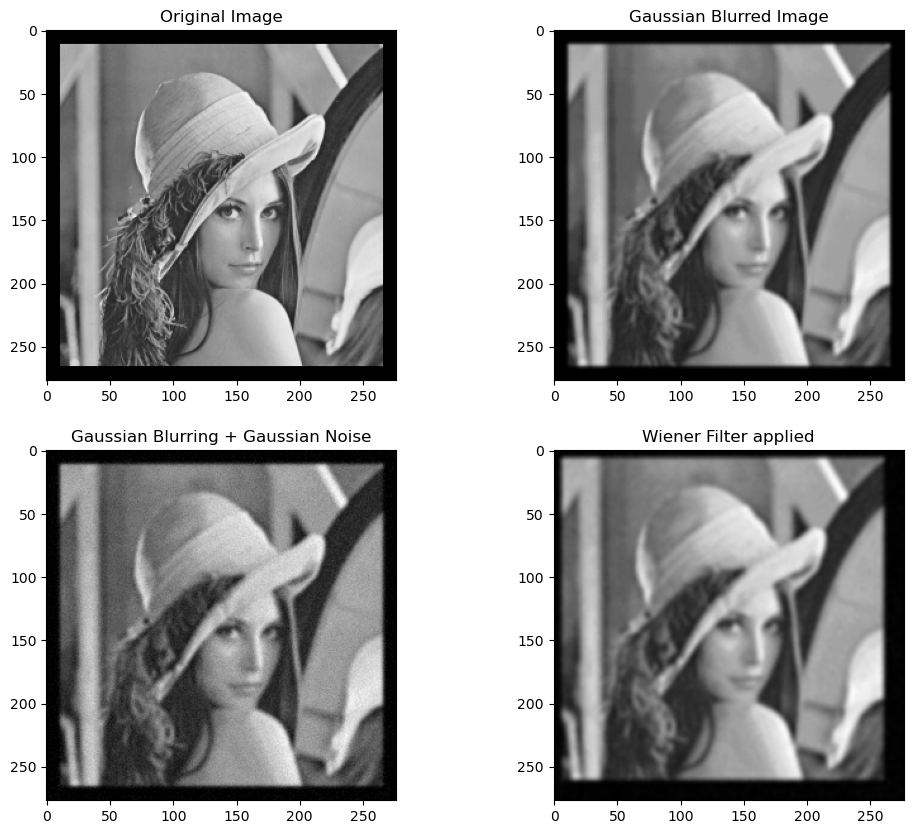

In [13]:
filtered_img = wiener_filter(noisy_img, kernel, K =k_min )

display = [img, blurred_img, noisy_img, filtered_img]
label = ['Original Image', 'Gaussian Blurred Image', 'Gaussian Blurring + Gaussian Noise', 'Wiener Filter applied']

fig = plt.figure(figsize=(12, 10))

for i in range(len(display)):
    fig.add_subplot(2, 2, i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])

plt.show()

# σn = 15, σb = 1.5

In [14]:
blurred_img = Gaussian_Blurring(img,sigma=1.5)

noisy_img = add_gaussian_noise(blurred_img, sigma = 15)

kernel = Gaussian_Kernal(sigma=1.5)

K_val = np.arange(0.01,2.001,0.001)
min_rms = 10**10
k_min = 0
for k in K_val:
    filtered_img = wiener_filter(noisy_img, kernel, K =k )
    rms_error = np.mean((img-filtered_img)**2)
    if(rms_error<min_rms):
        k_min = k
print("Optimal k = {}".format(k_min))

0.9975676473775693


100%|██████████| 277/277 [00:26<00:00, 10.37it/s]


Optimal k = 1.9999999999999982


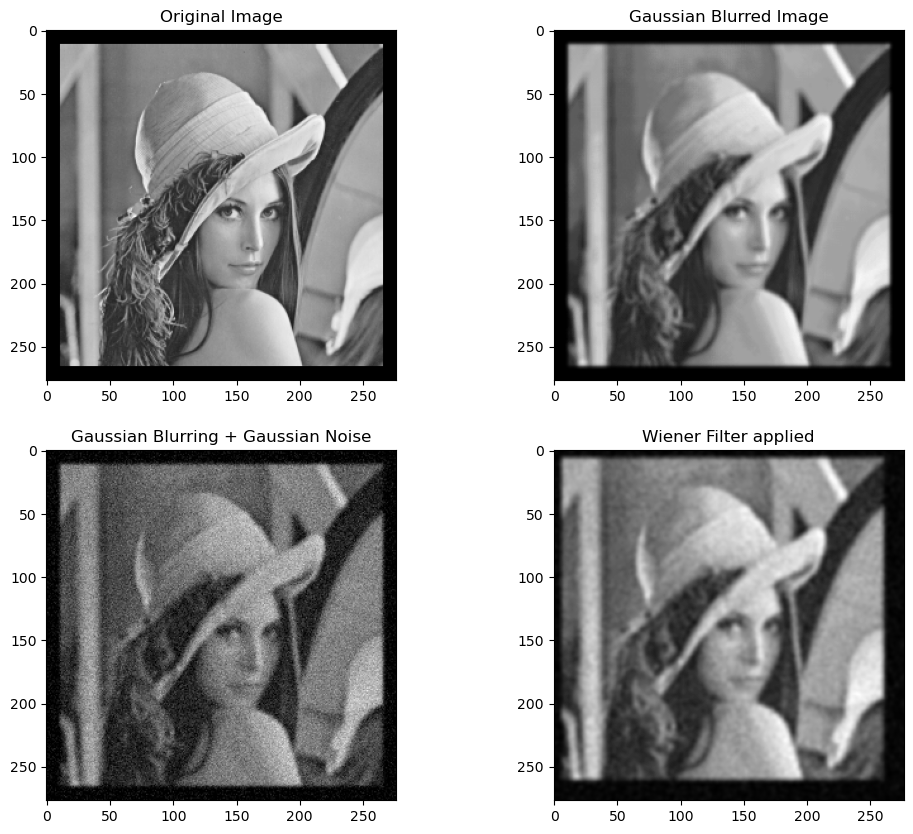

In [15]:
filtered_img = wiener_filter(noisy_img, kernel, K =k_min )

display = [img, blurred_img, noisy_img, filtered_img]
label = ['Original Image', 'Gaussian Blurred Image', 'Gaussian Blurring + Gaussian Noise', 'Wiener Filter applied']

fig = plt.figure(figsize=(12, 10))

for i in range(len(display)):
    fig.add_subplot(2, 2, i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])

plt.show()